In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from yellowbrick.model_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle


In [289]:
dfr = pd.read_csv(r"../data/laba3.csv")
dfres= pd.read_csv(r"../data/laba3Reserve.csv")
dfres=dfres.drop(['Style','Transmission','Make','Model','Fuel_type'],axis=1)

dfc = pd.read_csv(r"../data/laba4.csv",decimal=",",delimiter=",")
df_0 = dfc[dfc["Fire Alarm"] == 0]
df_1 = dfc[dfc["Fire Alarm"] == 1]
df_1_cut = df_1.sample(len(df_0))

dfc = pd.concat([df_1_cut, df_0], axis=0)
dfc = shuffle(dfc)


In [290]:
y_class = dfc["Fire Alarm"]
X_class = dfc.drop("Fire Alarm", axis=1)
y_reg = dfr["Price"]
X_reg = dfr.drop("Price", axis=1)

y_res = dfres["Price"]
X_res = dfres.drop("Price", axis=1)


In [253]:
from sklearn.ensemble import GradientBoostingRegressor

def test_reg(X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    bag = GradientBoostingRegressor().fit(x_train, y_train)
    print(f'R^2: {bag.score(x_test, y_test)}')

In [254]:
from sklearn.ensemble import BaggingClassifier
def test_class(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    bag = BaggingClassifier().fit(X_train, y_train)
    print(confusion_matrix(y_test, bag.predict(X_test)))
    print(classification_report(y_test, bag.predict(X_test)))


In [255]:
test_reg(X_reg, y_reg)

R^2: 0.8302929441693665


In [256]:
test_class(X_class,y_class)

[[5758    0]
 [   2 5665]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5758
           1       1.00      1.00      1.00      5667

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



# Variance Treshold


### Regression

In [257]:
vt = VarianceThreshold(4)
X_vt = vt.fit_transform(X_reg)

print(X_reg.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_reg(X_vt, y_reg)

(29378, 935)
(29378, 4)
R^2: 0.7902339401280002


### Classification

In [258]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X_class)

print(X_class.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_class(X_vt, y_class)

(34620, 15)
(34620, 14)
[[5670    0]
 [   2 5753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5670
           1       1.00      1.00      1.00      5755

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



# SelectKBest
### Regression

In [259]:
skb = SelectKBest(k=25)
X_skb = skb.fit_transform(X_reg, y_reg)

print(X_reg.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_reg(X_skb, y_res)

C:\Users\djego\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  9  13  29  40  49  56  58  60  68  82  88 111 117 134 136 158 173 180
 182 191 192 193 194 207 214 232 237 243 254 262 263 265 297 299 302 316
 317 318 323 324 326 327 341 344 351 356 362 367 369 378 383 391 392 396
 398 404 406 411 412 413 418 433 442 443 444 445 447 448 450 452 456 462
 468 469 485 487 489 497 503 536 537 549 556 560 561 562 563 567 570 585
 586 587 591 593 598 605 611 621 628 633 641 642 648 651 660 675 676 677
 682 683 689 690 695 702 706 712 718 727 730 733 735 738 743 754 756 758
 763 764 766 768 771 785 792 800 802 821 822 825 834 852 867 875 876 877
 894 897 900 903 906] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\

(29378, 935)
(29378, 25)
R^2: 0.67295306329361


### Classification

In [260]:
skb = SelectKBest(k=5)
X_skb = skb.fit_transform(X_class, y_class)

print(X_class.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_class(X_skb, y_class)

(34620, 15)
(34620, 5)
[[5730    0]
 [   1 5694]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5730
           1       1.00      1.00      1.00      5695

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



## RFE
### Regression

In [261]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression())

rfe = RFE(estimator=rfe, n_features_to_select=4,step=1).fit(X_res, y_res)
X_rfe = pd.DataFrame(rfe.transform(X_res), columns=rfe.get_feature_names_out())

print(X_res.shape)
print(X_rfe.shape)

test_reg(X_rfe, y_res)

(29378, 4)
(29378, 4)
R^2: 0.7863026647771827


### Classification

In [262]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_class, y_class)

rfe = RFE(estimator=tree, n_features_to_select=30).fit(X_class, y_class)
X_rfe = pd.DataFrame(rfe.transform(X_class), columns=rfe.get_feature_names_out())

print(X_class.shape)
print(X_rfe.shape)

test_class(X_rfe, y_class)

(34620, 15)
(34620, 15)
[[5698    0]
 [   1 5726]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5698
           1       1.00      1.00      1.00      5727

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



# PCA
### Regression

In [263]:

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_res, y_res)

print(X_res.shape)
print(X_pca.shape)

test_reg(X_pca, y_res)


(29378, 4)
(29378, 4)
R^2: 0.7687332369044715


### Classification

In [264]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_class, y_class)

print(X_class.shape)
print(X_pca.shape)

test_class(X_pca, y_class)


(34620, 15)
(34620, 2)
[[5723    0]
 [   0 5702]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5723
           1       1.00      1.00      1.00      5702

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



# TSNE
### Regression

In [265]:
tsne = TSNE()
X_tsner = tsne.fit_transform(X_res)

print(X_res.shape)
print(X_tsner.shape)

test_reg(X_tsner, y_res)

(29378, 4)
(29378, 2)
R^2: 0.17788765930214


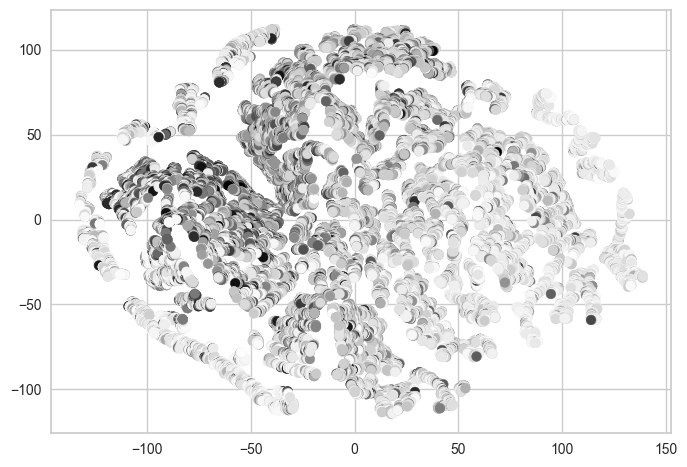

In [266]:
plt.scatter(X_tsner[:,0], X_tsner[:,1], c=y_res)


### Classification

In [267]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_class)

print(X_class.shape)
print(X_tsne.shape)

test_class(X_tsne, y_class)

(34620, 15)
(34620, 2)
[[5672    7]
 [   2 5744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5679
           1       1.00      1.00      1.00      5746

    accuracy                           1.00     11425
   macro avg       1.00      1.00      1.00     11425
weighted avg       1.00      1.00      1.00     11425



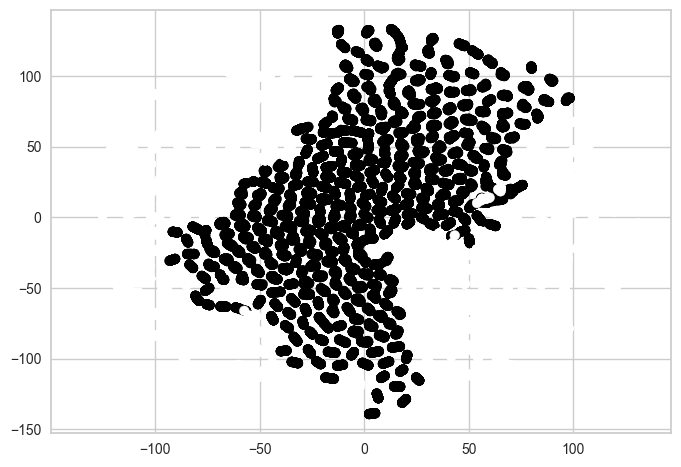

In [268]:
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_class)

# Isomap
### Regression

In [269]:
# MemoryError: Unable to allocate 6.43 GiB for an array with shape (29378, 29378) and data type float64

X_res=X_res[:8000]
y_res=y_res[:8000]

In [270]:
from sklearn.manifold import Isomap
isomap = Isomap()
X_iso = isomap.fit_transform(X_res)

print(X_res.shape)
print(X_iso.shape)

test_reg(X_iso, y_res)

(8000, 4)
(8000, 2)
R^2: 0.2146217908911492


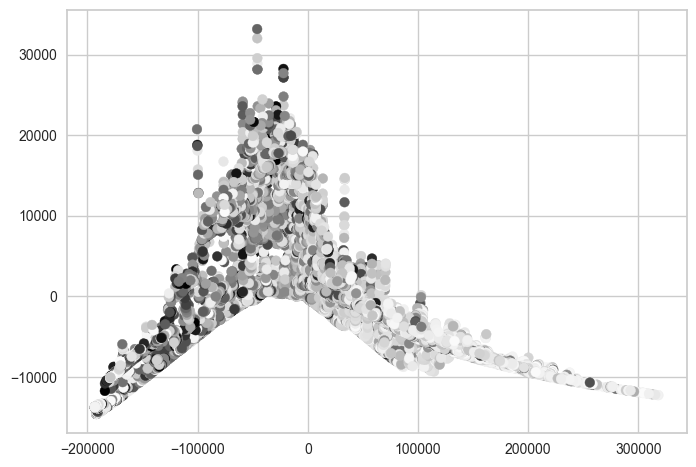

In [271]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y_res)


### Classification

In [292]:
#MemoryError: Unable to allocate 8.93 GiB for an array with shape (34620, 34620) and data type float64

X_class=X_class[:9000]
y_class=y_class[:9000]


array([1, 0], dtype=int64)

In [293]:
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X_class)

print(X_class.shape)
print(X_iso.shape)

test_class(X_iso, y_class)

C:\Users\djego\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 90 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\L

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\djego\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficie

(9000, 15)
(9000, 2)
[[1532    2]
 [   9 1427]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1534
           1       1.00      0.99      1.00      1436

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



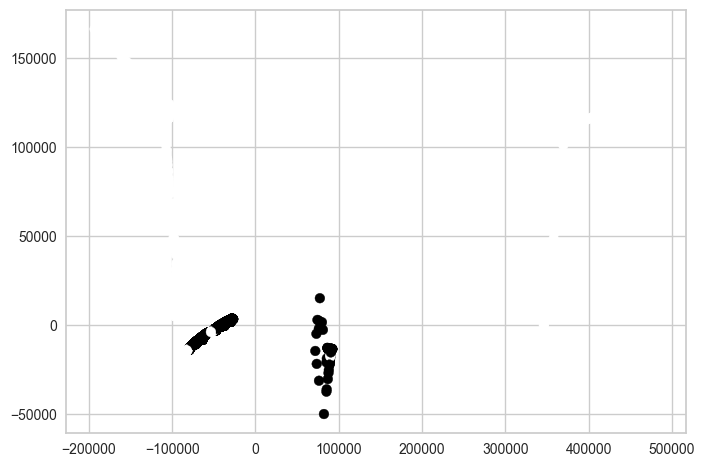

In [295]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y_class)


Вывод:
1.Для регрессии хорошо подходят алгоритмы понижения размерности:Variance Treshold
2.Для классификации хорошо подходят алгоритмы понижения размерности:SelectKbest,PCA

Для моих моделей не очень подходят isomap и tsne